In [309]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
import os
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import matplotlib as mpl
%matplotlib inline
from itertools import chain
from collections import Counter
np.random.seed(19680801)

In [392]:
df_jobs = pd.read_csv("Combined_data_jobs.csv")
df_salary = pd.read_csv("Salary_combined_alldata.csv")

In [315]:
df_salary.shape

(9935, 5)

In [316]:
df_jobs.shape

(21912, 8)

In [317]:
df_jobs.groupby('job_category').count()

title  company  summary  location  experience  city  state
job_category                                                                
Business Analyst   9255     9255     9255      9255        7936  9255   9249
Data Analyst       4870     4870     4869      4870        4383  4870   4858
Data Engineer      2766     2766     2766      2766        2712  2766   2753
Data Scientist     4063     4063     4062      4063        3940  4063   4047

In [318]:
df_salary.groupby('job_category').count()

title  Avg_salary  State  salary_year
job_category                                           
Business Analyst   4547        4547   4547         4547
Data Analyst       2852        2852   2852         2852
Data Engineer      1065        1065   1065         1065
Data Scientist     1471        1471   1471         1471

In [319]:
df_jobs.head(10)


title                                   company  \
0      NAS Business Analyst Intern                           Aloha Air Cargo   
1          Compliance Data Analyst                      University of Alaska   
2          Junior Business Analyst        Yukon-Kuskokwim Health Corporation   
3                     Data Analyst                 Kakivik Asset Management    
4    Part-Time Data Analyst Intern                          Ogletree Deakins   
5  Affirmative Action Data Analyst                          Ogletree Deakins   
6          Healthcare Data Analyst             Souast Alabama Medical Center   
7            Research Data Analyst  Alaka`ina Foundation Family of Companies   
8                    Data Engineer                              Regions Bank   
9               Business Analyst I                       Digital Management    

                                             summary  \
0  The Business Analyst Intern must be a self-sta...   
1  Data management and programming are necessary ...   
2  The Business Analyst - Junior position require...   
3  Experience as a data analyst. This role will b...   
4  Our Birmingham, AL office has an opportunity f...   
5  The Data Analyst will support attorneys in res...   
6  The Healthcare Data Analyst is primarily respo...   
7  Convey the understanding of data use and analy...   
8  The Data Engineer role narrows the scope to wo...   
9  DMI is seeking a full time Business Analyst I ...   

                             location  \
0                       Anchorage, AK   
1                       Anchorage, AK   
2                          Bethel, AK   
3  Anchorage, AK 99503 (Midtown area)   
4                      Birmingham, AL   
5                      Birmingham, AL   
6                          Dothan, AL   
7                     Fort Rucker, AL   
8                          Hoover, AL   
9                      Huntsville, AL   

                                          experience      job_category  \
0                                   Microsoft Office  Business Analyst   
1                                           Ellucian      Data Analyst   
2                                                NaN  Business Analyst   
3                                                NaN      Data Analyst   
4                            Excel, Microsoft Office      Data Analyst   
5                                              Excel      Data Analyst   
6               Business Intelligence, R, SAS, Excel      Data Analyst   
7                          MATLAB, Signal Processing      Data Analyst   
8  Linux, Microsoft SQL Server, Project Managemen...     Data Engineer   
9      Microsoft Office, Excel, Java, Microsoft Word  Business Analyst   

          city state  
0    Anchorage    AK  
1    Anchorage    AK  
2       Bethel    AK  
3    Anchorage    AK  
4   Birmingham    AL  
5   Birmingham    AL  
6       Dothan    AL  
7  Fort Rucker    AL  
8       Hoover    AL  
9   Huntsville    AL

In [35]:
df_salary.head(10)

title      Avg_salary State      job_category  \
0                     V Dart, Inc.   $65.00 per day    CA  Business Analyst   
1                         Etonwood     $798 per day    CA  Business Analyst   
2               Kanand Corporation     $312 per day    CA  Business Analyst   
3         Cygnus Professionals Inc   $69.73 per day    CA  Business Analyst   
4  Greenlight Technical Consulting   $72.46 per day    CA  Business Analyst   
5              Xoriant Corporation     $501 per day    FL  Business Analyst   
6                     V Dart, Inc.     $130 per day    MA  Business Analyst   
7                     V Dart, Inc.     $120 per day    MD  Business Analyst   
8                        Tekwissen   $69.88 per day    MI  Business Analyst   
9                     V Dart, Inc.   $90.00 per day    MI  Business Analyst   

    salary_year  
0   $16,965.00   
1  $208,278.00   
2   $81,432.00   
3   $18,199.53   
4   $18,912.06   
5  $130,761.00   
6   $33,930.00   
7   $31,320.00   
8   $18,238.68   
9   $23,490.00

In [93]:
#df_salary= df_salary.drop(['Unnamed: 4','Avg_salary.1','Unnamed: 7'], axis = 1) 


In [463]:
#making df for each job category
df_jobs_BA = df_jobs.loc[df_jobs['job_category'] == 'Business Analyst']
df_jobs_DA = df_jobs.loc[df_jobs['job_category'] == 'Data Analyst']
df_jobs_DE = df_jobs.loc[df_jobs['job_category'] == 'Data Engineer']
df_jobs_DS = df_jobs.loc[df_jobs['job_category'] == 'Data Scientist']

In [321]:
df_jobs_BA.shape

(9255, 8)

In [470]:
df_jobs_BA = df_jobs_BA.loc[~df_jobs_BA['experience'].isna()]


In [323]:
df_jobs_DA.shape

(4870, 8)

In [471]:
df_jobs_DA = df_jobs_DA.loc[~df_jobs_DA['experience'].isna()]

In [325]:
df_jobs_DA.shape

(4383, 8)

In [326]:
df_jobs_DE.shape

(2766, 8)

In [472]:
df_jobs_DE = df_jobs_DE.loc[~df_jobs_DE['experience'].isna()]

In [328]:
df_jobs_DE.shape

(2712, 8)

In [329]:
df_jobs_DS.shape

(4063, 8)

In [473]:
df_jobs_DS = df_jobs_DS.loc[~df_jobs_DS['experience'].isna()]

In [331]:
df_jobs_DS.shape

(3940, 8)

In [ ]:
#creating word cloud for Business Analyst jobs

In [332]:
wcba = WordCloud(background_color="white", max_words=2000)
# generate word cloud
wcba.generate(''.join(df_jobs_BA['experience']))


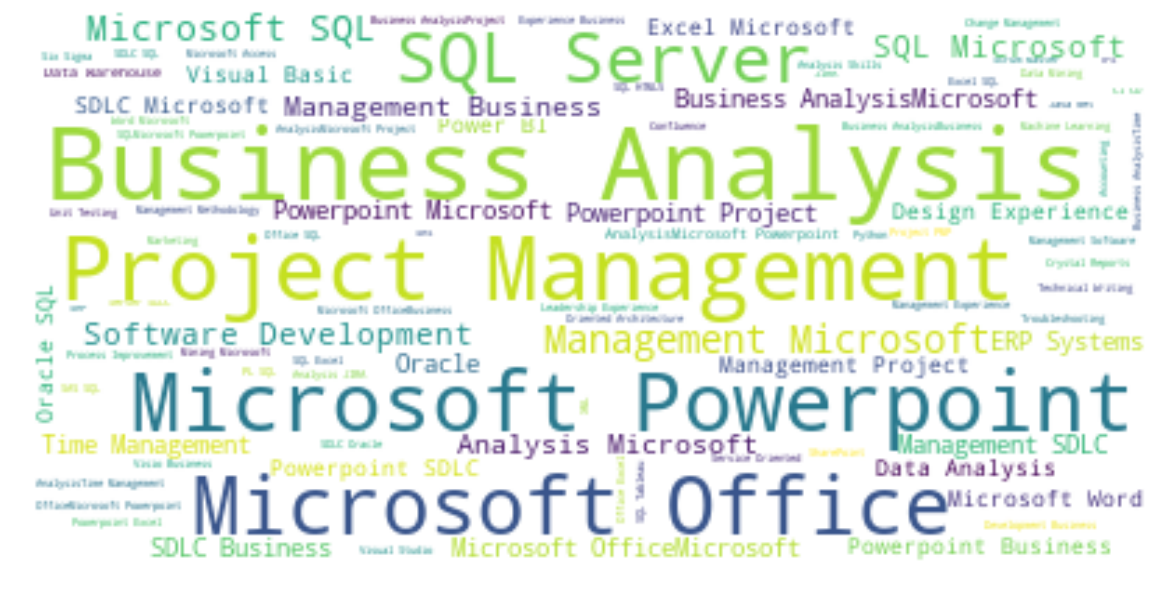

In [333]:
# show
plt.figure(figsize=(20, 15))
plt.imshow(wcba, interpolation='bilinear')
plt.axis("off")
plt.axis("off")
plt.show()

In [334]:
len(list(filter(lambda s: s.find('SQL')>=0, df_jobs_BA['experience'])))

2343

In [335]:
df_jobs_BA['experience']

0                                         Microsoft Office
9            Microsoft Office, Excel, Java, Microsoft Word
11                     Business Analysis, Microsoft Office
16                                              Accounting
17                      Time Management, Business Analysis
24                Business Intelligence, Business Analysis
29       SAS, SQL, Microsoft Office, SharePoint, Design...
30       TFS, Hadoop, SDLC, SQL, Big Data, HP ALM, Desi...
31       SQL, Big Data, Design Experience, Data Analysi...
32                       Salesforce CRM, Business Analysis
35       IIS, Microsoft SQL Server, PowerShell, Azure, ...
38                                             Oracle, SQL
39                                    Microsoft Powerpoint
40       .Net, Certified Scrum Master, Microsoft Powerp...
41                        Axure, SQL, Balsamiq, VersionOne
44                  SOX, PMP, PCI, CAPM, Business Analysis
48                                      Project Manageme

In [336]:
len(list(filter(lambda s: s.find('SDLC')>=0, df_jobs_BA['experience'])))

1253

In [337]:
list(map(lambda s: s.split(', '), df_jobs_BA['experience']))

[['Microsoft Office'],
 ['Microsoft Office', 'Excel', 'Java', 'Microsoft Word'],
 ['Business Analysis', 'Microsoft Office'],
 ['Accounting'],
 ['Time Management', 'Business Analysis'],
 ['Business Intelligence', 'Business Analysis'],
 ['SAS',
  'SQL',
  'Microsoft Office',
  'SharePoint',
  'Design Experience',
  'Military Experience'],
 ['TFS',
  'Hadoop',
  'SDLC',
  'SQL',
  'Big Data',
  'HP ALM',
  'Design Experience',
  'Data Analysis',
  'Business Analysis',
  'Military Experience',
  'VersionOne'],
 ['SQL',
  'Big Data',
  'Design Experience',
  'Data Analysis',
  'Leadership Experience',
  'Military Experience',
  'TFS',
  'Hadoop',
  'SDLC',
  'HP ALM',
  'Business Analysis',
  'VersionOne'],
 ['Salesforce CRM', 'Business Analysis'],
 ['IIS',
  'Microsoft SQL Server',
  'PowerShell',
  'Azure',
  'CI/CD',
  'SQL',
  'Customer Service',
  'T-SQL',
  'Business Analysis'],
 ['Oracle', 'SQL'],
 ['Microsoft Powerpoint'],
 ['.Net',
  'Certified Scrum Master',
  'Microsoft Powerpoin

In [338]:
list_experience_BA = list(chain.from_iterable(list(map(lambda s: s.split(', '), df_jobs_BA['experience']))))

In [339]:
c = Counter(list_experience_BA)
c2 = c.most_common(20)
print(c2)

[('Business Analysis', 2821), ('SQL', 2119), ('Microsoft Office', 1818), ('Microsoft Powerpoint', 1506), ('SDLC', 1253), ('Project Management', 1064), ('Excel', 920), ('Oracle', 778), ('JIRA', 592), ('Time Management', 578), ('Tableau', 557), ('Microsoft SQL Server', 544), ('SharePoint', 486), ('Software Development', 414), ('ERP Systems', 399), ('Java', 367), ('Microsoft Word', 338), ('PMP', 314), ('HTML5', 305), ('Accounting', 291)]


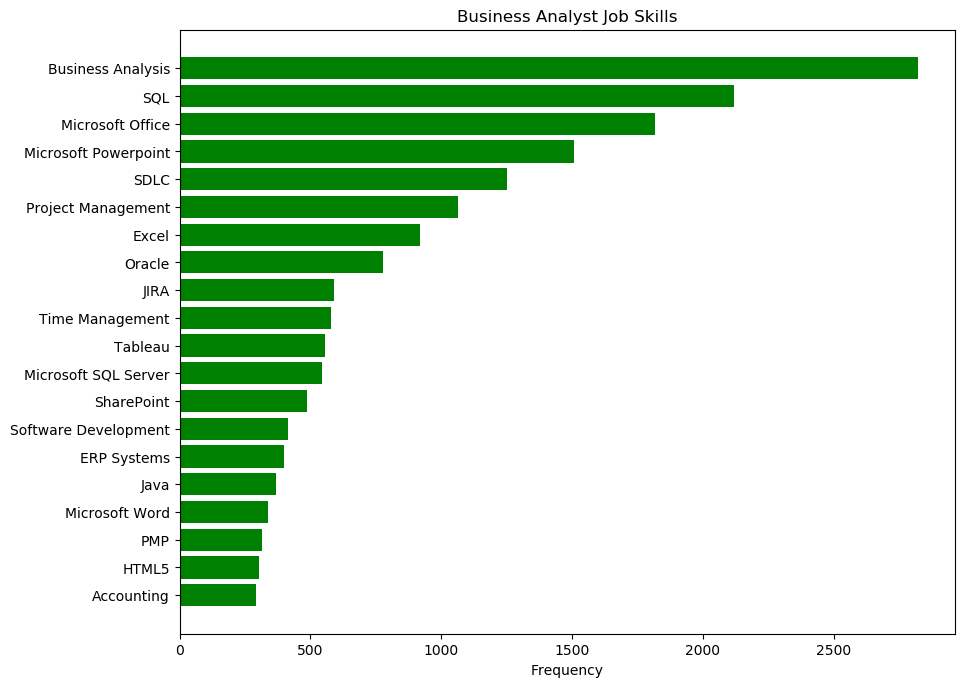

In [340]:
fig, ax = plt.subplots(figsize=(10, 8),dpi=100)
ax.barh(list(map(lambda t:t[0],c2)), list(map(lambda t:t[1],c2)), color='green')
ax.invert_yaxis()
ax.set_xlabel('Frequency')
ax.set_title('Business Analyst Job Skills')
plt.show()
fig.savefig('BA_skils.png', dpi=300)

In [ ]:
#creating world cloud for Data Analyst job skills

In [341]:
wcda = WordCloud(background_color="white", max_words=2000)
# generate word cloud
wcda.generate(''.join(df_jobs_DA['experience']))

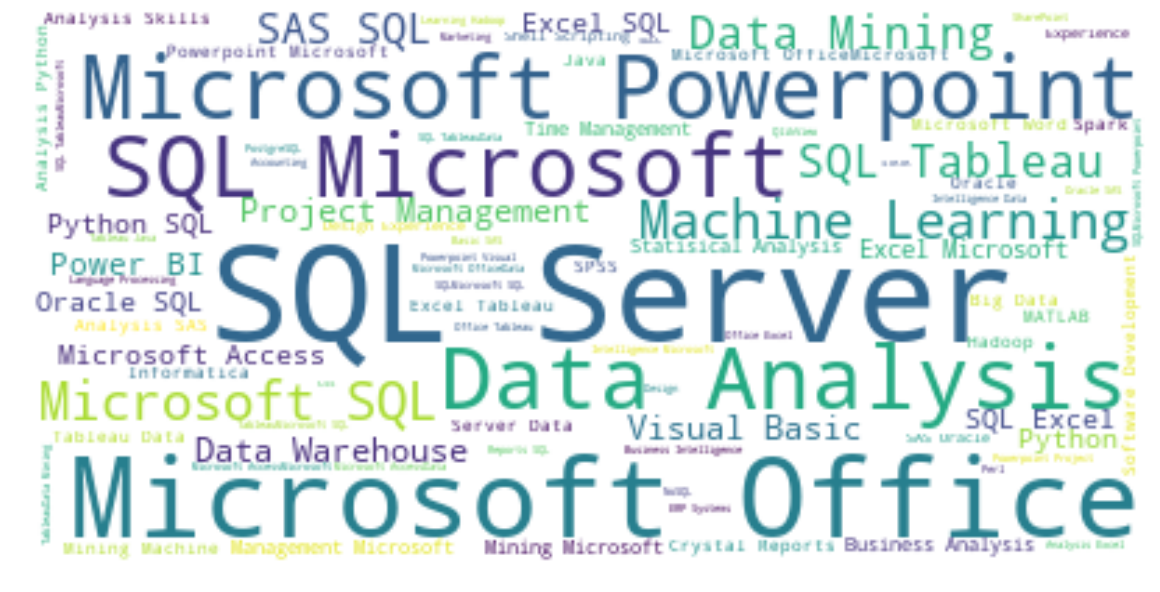

In [342]:
plt.figure(figsize=(20, 15))
plt.imshow(wcda, interpolation='bilinear')
plt.axis("off")
plt.axis("off")
plt.show()

In [343]:
len(list(filter(lambda s: s.find('SQL')>=0, df_jobs_DA['experience']))) #count number of particular skills

2469

In [468]:
df_jobs_DA['experience'] # visualize the column containing skills

1                                                 Ellucian
3                                                      NaN
4                                  Excel, Microsoft Office
5                                                    Excel
6                     Business Intelligence, R, SAS, Excel
7                                MATLAB, Signal Processing
12                                                     NaN
14                                                     NaN
18                                                     SAS
19       Microsoft SQL Server, Data Mining, Project Man...
20       Customer Segmentation, Marketing, SAS, SQL, SP...
23        Microsoft Powerpoint, Medical Terminology, Excel
27                       Time Management, Microsoft Office
36             Hive, Quantitative Analysis, R, Python, SQL
42       XML, Perl, SQL, JSON, .Net, Java, T-SQL, MySQL...
43       XML, Perl, SQL, JSON, .Net, Java, T-SQL, MySQL...
45       Hive, Hadoop, SQL, Tableau, Big Data, MySQL, S.

In [477]:
list(map(lambda s: s.split(', '), df_jobs_DA['experience'])) # converting the lis tin each row inot one nested list
list_experience_DA = list(chain.from_iterable(list(map(lambda s: s.split(', '), df_jobs_DA['experience'])))) 
list_experience_DA

['Ellucian',
 'Excel',
 'Microsoft Office',
 'Excel',
 'Business Intelligence',
 'R',
 'SAS',
 'Excel',
 'MATLAB',
 'Signal Processing',
 'SAS',
 'Microsoft SQL Server',
 'Data Mining',
 'Project Management',
 'SQL',
 'Microsoft Access',
 'Customer Segmentation',
 'Marketing',
 'SAS',
 'SQL',
 'SPSS',
 'Data Analysis',
 'Microsoft Powerpoint',
 'Medical Terminology',
 'Excel',
 'Time Management',
 'Microsoft Office',
 'Hive',
 'Quantitative Analysis',
 'R',
 'Python',
 'SQL',
 'XML',
 'Perl',
 'SQL',
 'JSON',
 '.Net',
 'Java',
 'T-SQL',
 'MySQL',
 'C#',
 'REST',
 'Python',
 'PHP',
 'XML',
 'Perl',
 'SQL',
 'JSON',
 '.Net',
 'Java',
 'T-SQL',
 'MySQL',
 'C#',
 'REST',
 'Python',
 'PHP',
 'Hive',
 'Hadoop',
 'SQL',
 'Tableau',
 'Big Data',
 'MySQL',
 'Spark',
 'Data Warehouse',
 'Git',
 'Data Analysis',
 'PostgreSQL',
 'JIRA',
 'AWS',
 'SAS',
 'Excel',
 'SQL',
 'SPSS',
 'R',
 'Excel',
 'SQL',
 'SPSS',
 'Leadership Experience',
 'SAS',
 'Microsoft Office',
 'Tableau',
 'Data Mining',
 'SD

In [478]:
cda = Counter(list_experience_DA)
cda3 = cda.most_common(20)
print(cda3)

[('SQL', 2340), ('Tableau', 1056), ('Python', 875), ('Microsoft Office', 870), ('Excel', 866), ('R', 847), ('Microsoft Powerpoint', 686), ('SAS', 666), ('Data Analysis', 635), ('Microsoft SQL Server', 559), ('Data Mining', 546), ('Oracle', 467), ('Machine Learning', 363), ('Microsoft Access', 358), ('Hadoop', 286), ('SPSS', 249), ('Data Warehouse', 246), ('Visual Basic', 239), ('Project Management', 228), ('Business Intelligence', 227)]


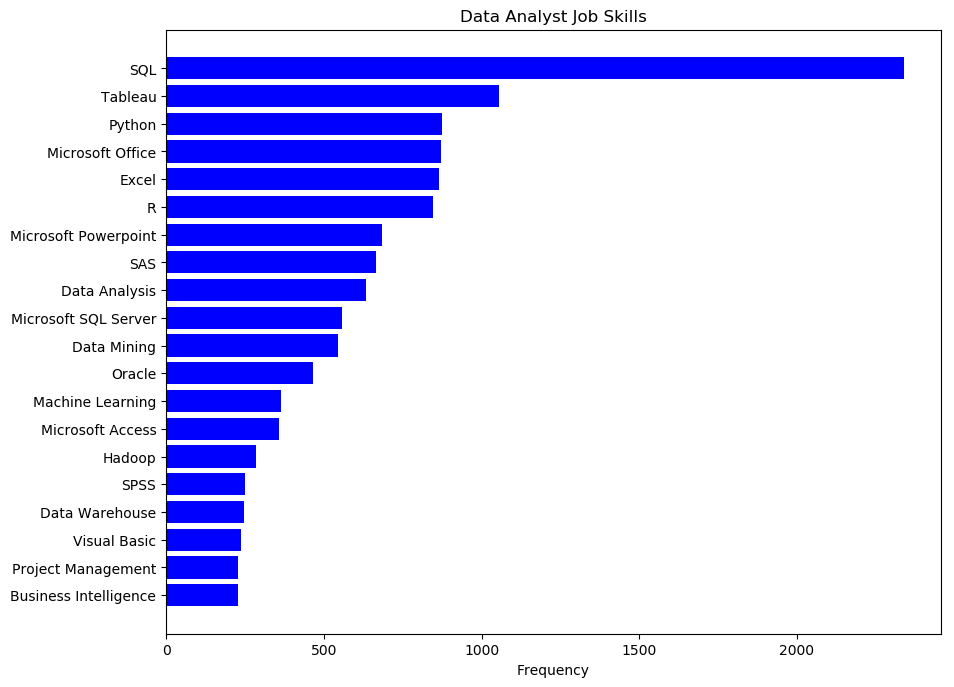

In [479]:
fig, ax = plt.subplots(figsize=(10, 8),dpi=100)
ax.barh(list(map(lambda t:t[0],cda3)), list(map(lambda t:t[1],cda3)), color='blue')
ax.invert_yaxis()
ax.set_xlabel('Frequency')
ax.set_title('Data Analyst Job Skills')
plt.show()
fig.savefig('DA_skils.png', dpi=300)

In [ ]:
 #creating word cloud for Data Engineer job skills

In [362]:
df_jobs_DE = df_jobs_DE.loc[~df_jobs_DE['experience'].isna()]# removing Nan in the experience column

In [365]:
wcde = WordCloud(background_color="white", max_words=2000)
# generate word cloud
wcde.generate(''.join(df_jobs_DE['experience']))

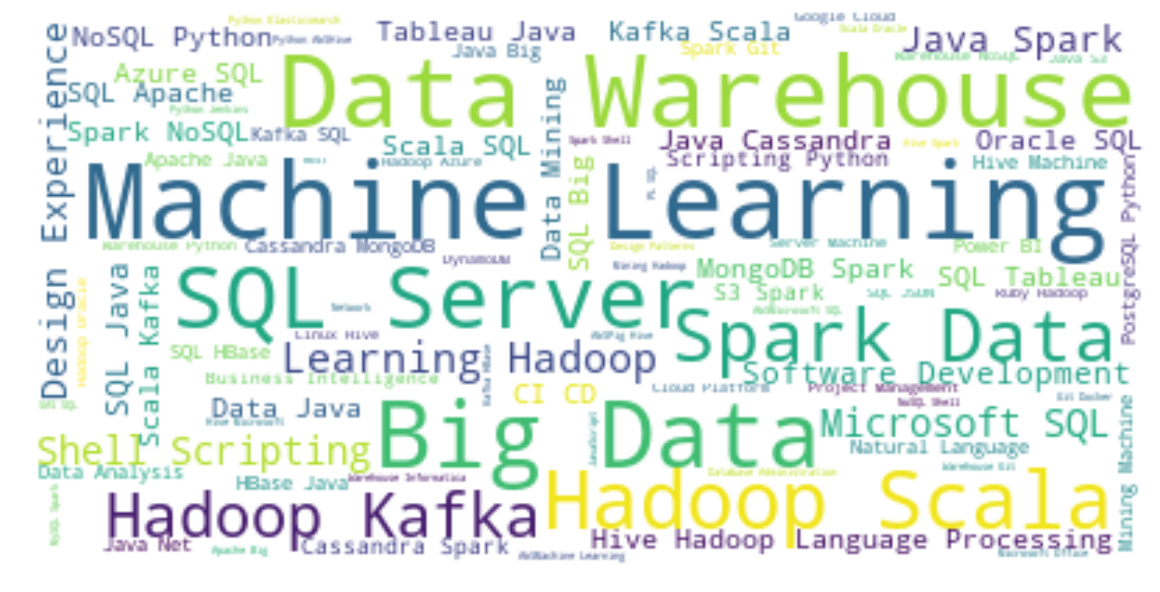

In [353]:
plt.figure(figsize=(20, 15))
plt.imshow(wcde, interpolation='bilinear')
plt.axis("off")
plt.axis("off")
plt.show()

In [358]:
list(map(lambda s: s.split(', '), df_jobs_DE['experience'])) # converting the lis tin each row inot one nested list

[['Linux',
  'Microsoft SQL Server',
  'Project Management',
  'Oracle',
  'SQL',
  'Troubleshooting',
  'Informatica'],
 ['Business Process Reengineering',
  'Kafka',
  'LDAP',
  'SQL',
  'Tableau',
  'Apache',
  'Spark',
  'NoSQL',
  'Adobe Marketing',
  'Elasticsearch'],
 ['Microsoft SQL Server',
  'OBIEE',
  'Machine Learning',
  'Power BI',
  'R',
  'Azure',
  'SQL',
  'Apache',
  'PL/SQL',
  'Quality Management',
  'Hadoop',
  'Kafka',
  'Oracle',
  'Microsoft Office',
  'Tableau',
  'Cassandra',
  'MongoDB',
  'Spark',
  'Data Warehouse',
  'REST'],
 ['Java',
  'Spark',
  'Machine Learning',
  'Data Warehouse',
  'Hadoop',
  'Kafka',
  'Python'],
 ['Spark', 'Scala'],
 ['Spark', 'Scala'],
 ['Java',
  'Data Mining',
  'Selenium',
  'REST',
  'Eclipse',
  'SQL',
  'DB2',
  'Groovy'],
 ['Database Administration',
  'Microsoft SQL Server',
  'SDLC',
  'Oracle',
  'HBase',
  'SQL',
  'Cassandra',
  'MongoDB',
  'Design Experience',
  'PostgreSQL',
  'NoSQL',
  'DB2'],
 ['JavaScript',


In [366]:
list_experience_DE = list(chain.from_iterable(list(map(lambda s: s.split(', '), df_jobs_DE['experience']))))#unpacking the nested list

In [360]:
cde = Counter(list_experience_DE)
cde3 = cde.most_common(20)
print(cde3)

[('Python', 1668), ('SQL', 1577), ('Hadoop', 1376), ('Spark', 1276), ('Java', 1195), ('AWS', 940), ('Scala', 788), ('Machine Learning', 777), ('Hive', 767), ('Kafka', 641), ('NoSQL', 620), ('Data Warehouse', 605), ('Big Data', 541), ('R', 527), ('Tableau', 439), ('Microsoft SQL Server', 396), ('Linux', 394), ('Azure', 370), ('Oracle', 367), ('HBase', 355)]


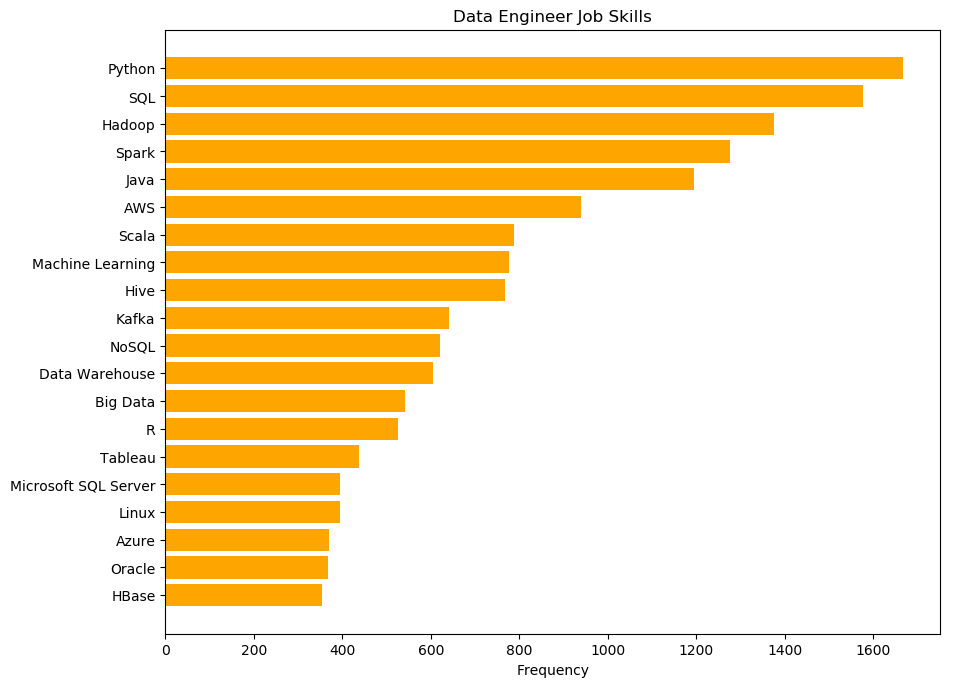

In [361]:
fig, ax = plt.subplots(figsize=(10, 8),dpi=100)
ax.barh(list(map(lambda t:t[0],cde3)), list(map(lambda t:t[1],cde3)), color='orange')
ax.invert_yaxis()
ax.set_xlabel('Frequency')
ax.set_title('Data Engineer Job Skills')
plt.show()
fig.savefig('DE_skils.png', dpi=300)

In [ ]:
#creating word cloud and bar graph for Data Science jobs

In [367]:
df_jobs_DS = df_jobs_DS.loc[~df_jobs_DS['experience'].isna()]

In [369]:
wcds = WordCloud(background_color="white", max_words=2000)
# generate word cloud
wcds.generate(''.join(df_jobs_DS['experience']))

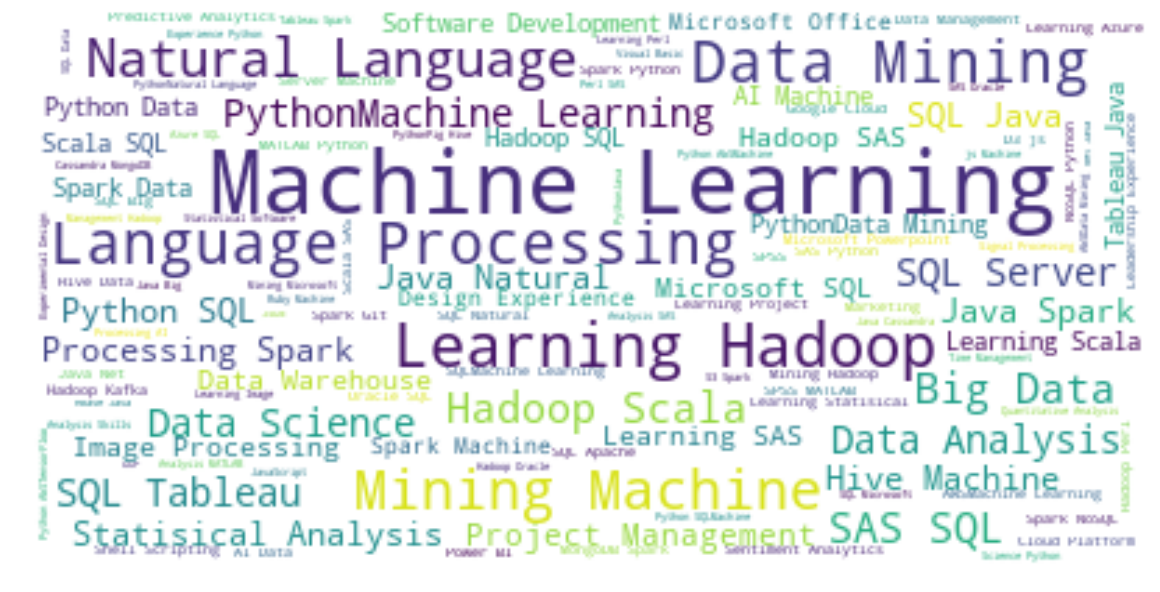

In [378]:
plt.figure(figsize=(20, 15))
plt.imshow(wcds, interpolation='bilinear')
plt.axis("off")
plt.axis("off")
plt.show()

In [379]:
list(map(lambda s: s.split(', '), df_jobs_DS['experience'])) # converting the lis tin each row inot one nested list

[['Data Mining'],
 ['Data Mining', 'Machine Learning', 'SPSS', 'R', 'SAS', 'Data Science'],
 ['Microsoft SQL Server',
  'Data Mining',
  'Marketing',
  'R',
  'Oracle',
  'SAS',
  'SQL',
  'Big Data',
  'DB2'],
 ['Microsoft SQL Server', 'Data Mining', 'R', 'Oracle', 'SAS', 'SQL', 'DB2'],
 ['Machine Learning', 'Data Analysis', 'R', 'Python'],
 ['SDLC'],
 ['Machine Learning', 'SPSS', 'R', 'SAS', 'Python', 'Tableau'],
 ['Ruby',
  'Machine Learning',
  'Perl',
  'Scala',
  'R',
  'Java',
  'Natural Language Processing',
  'SPSS',
  'Python'],
 ['Machine Learning',
  'Power BI',
  'R',
  'Statisical Analysis',
  'SAS',
  'SQL',
  'Tableau',
  'Data Warehouse',
  "Driver's License",
  'Python'],
 ['Java', 'Machine Learning', 'Hadoop', 'Python'],
 ['Hive',
  'Data Mining',
  'Microsoft SQL Server',
  'Machine Learning',
  'Hadoop',
  'R',
  'Statisical Analysis',
  'S3',
  'Spark',
  'PostgreSQL',
  'IVR',
  'Data Science',
  'Python',
  'JIRA',
  'Elasticsearch'],
 ['Instructional Design', '

In [380]:
list_experience_DS = list(chain.from_iterable(list(map(lambda s: s.split(', '), df_jobs_DS['experience']))))#unpacking the nested list

In [381]:
cds = Counter(list_experience_DS)
cds3 = cds.most_common(20)
print(cds3)

[('Python', 2870), ('Machine Learning', 2738), ('R', 2322), ('SQL', 2030), ('Hadoop', 1347), ('Spark', 1122), ('Java', 1083), ('Data Mining', 1066), ('SAS', 893), ('Tableau', 721), ('Natural Language Processing', 716), ('Hive', 712), ('Scala', 633), ('C/C++', 575), ('MATLAB', 549), ('AWS', 544), ('AI', 508), ('TensorFlow', 459), ('Big Data', 405), ('NoSQL', 386)]


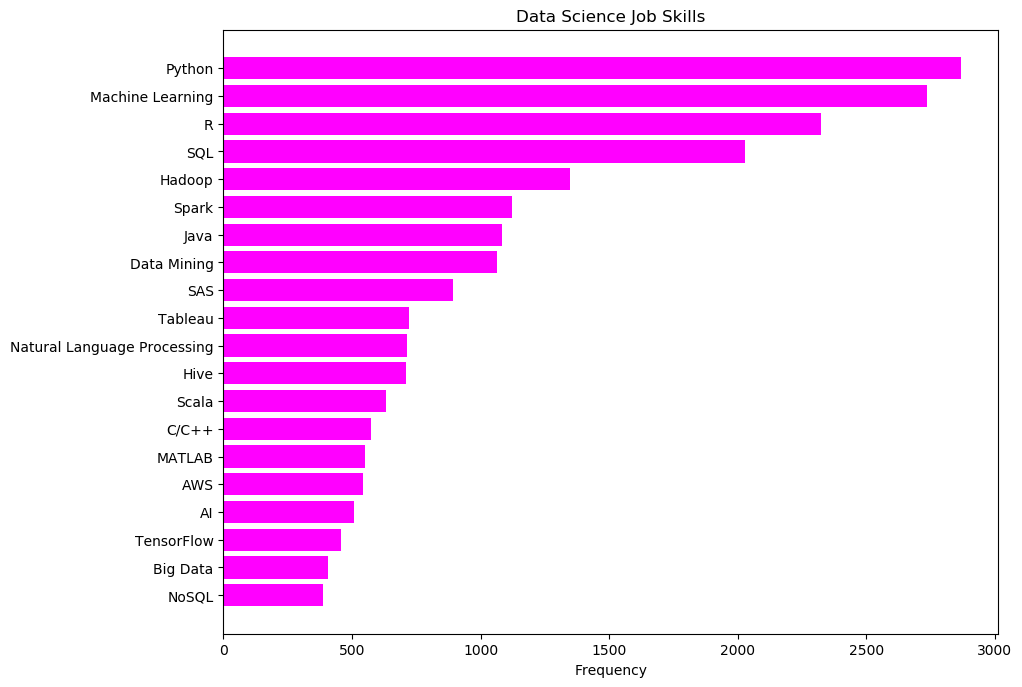

In [450]:
fig, ax = plt.subplots(figsize=(10, 8),dpi=100)
ax.barh(list(map(lambda t:t[0],cds3)), list(map(lambda t:t[1],cds3)), color='magenta')
ax.invert_yaxis()
ax.set_xlabel('Frequency')
ax.set_title('Data Science Job Skills')
plt.show()
fig.savefig('DS_skils.png', dpi=500)

In [397]:
df_jobs_DE_com = df_jobs_DE.loc[~df_jobs_DE['company'].isna()]# removing Nan in the experience column

In [398]:
wcdecom = WordCloud(background_color="white", max_words=1000)
# generate word cloud
wcdecom.generate(''.join(df_jobs_DE_com['company']))

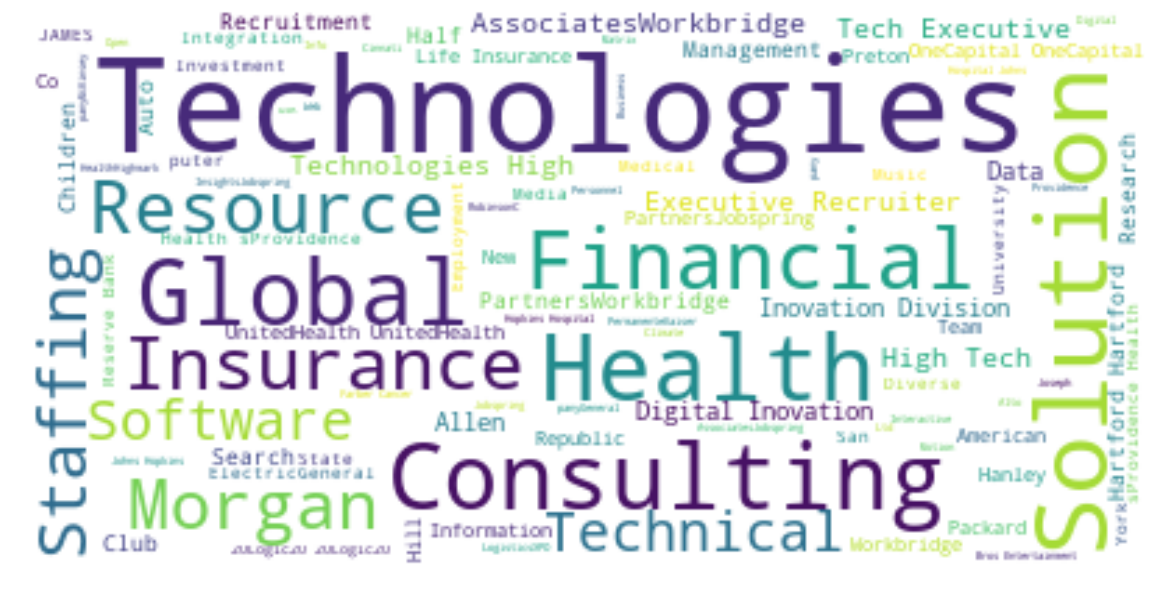

In [399]:
plt.figure(figsize=(20, 15))
plt.imshow(wcdecom, interpolation='bilinear')
plt.axis("off")
plt.axis("off")
plt.show()

In [400]:
df_jobs_DA_com = df_jobs_DA.loc[~df_jobs_DA['company'].isna()]# removing Nan in the experience column


In [401]:
wcdacom = WordCloud(background_color="white", max_words=1000)
# generate word cloud
wcdacom.generate(''.join(df_jobs_DA_com['company']))

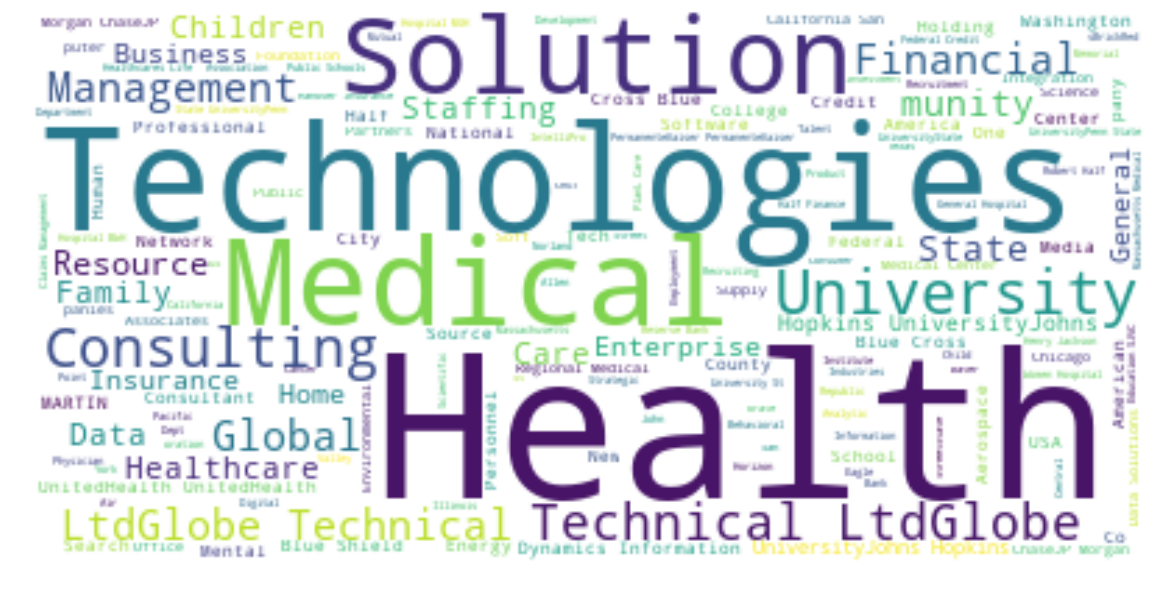

In [402]:
plt.figure(figsize=(20, 15))
plt.imshow(wcdacom, interpolation='bilinear')
plt.axis("off")
plt.axis("off")
plt.show()

In [403]:
df_jobs_DS_com = df_jobs_DS.loc[~df_jobs_DS['company'].isna()]# removing Nan in the experience column

In [404]:
wcdscom = WordCloud(background_color="white", max_words=1000)
# generate word cloud
wcdscom.generate(''.join(df_jobs_DS_com['company']))

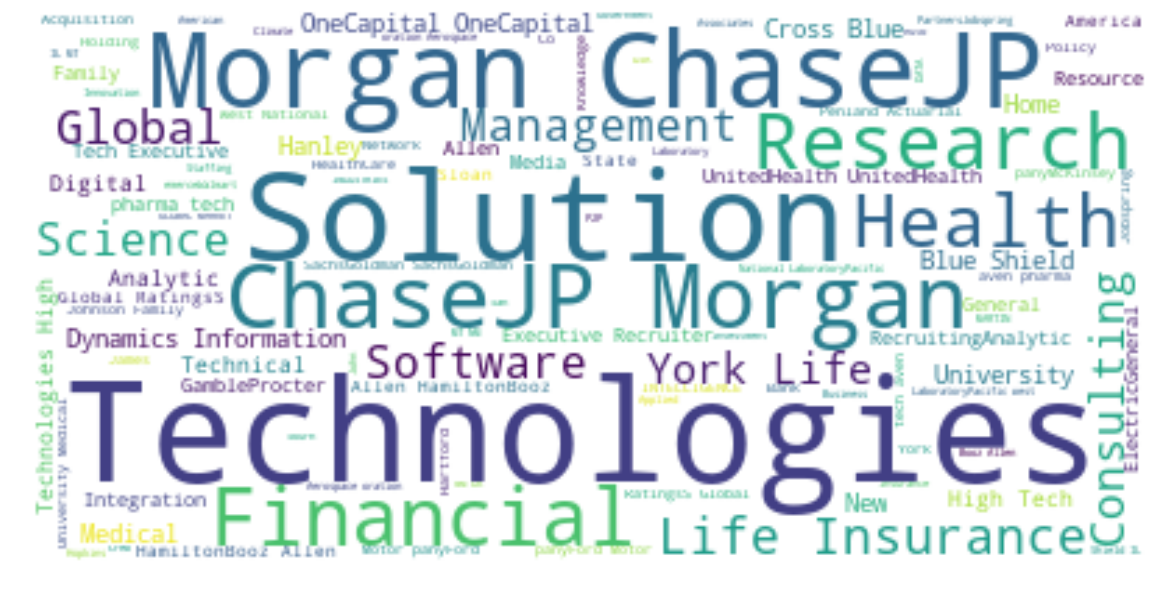

In [405]:
plt.figure(figsize=(20, 15))
plt.imshow(wcdscom, interpolation='bilinear')
plt.axis("off")
plt.axis("off")
plt.show()

In [406]:
df_jobs_BA_com = df_jobs_BA.loc[~df_jobs_BA['company'].isna()]# removing Nan in the experience column

In [407]:
wcbacom = WordCloud(background_color="white", max_words=1000)
# generate word cloud
wcbacom.generate(''.join(df_jobs_BA_com['company']))

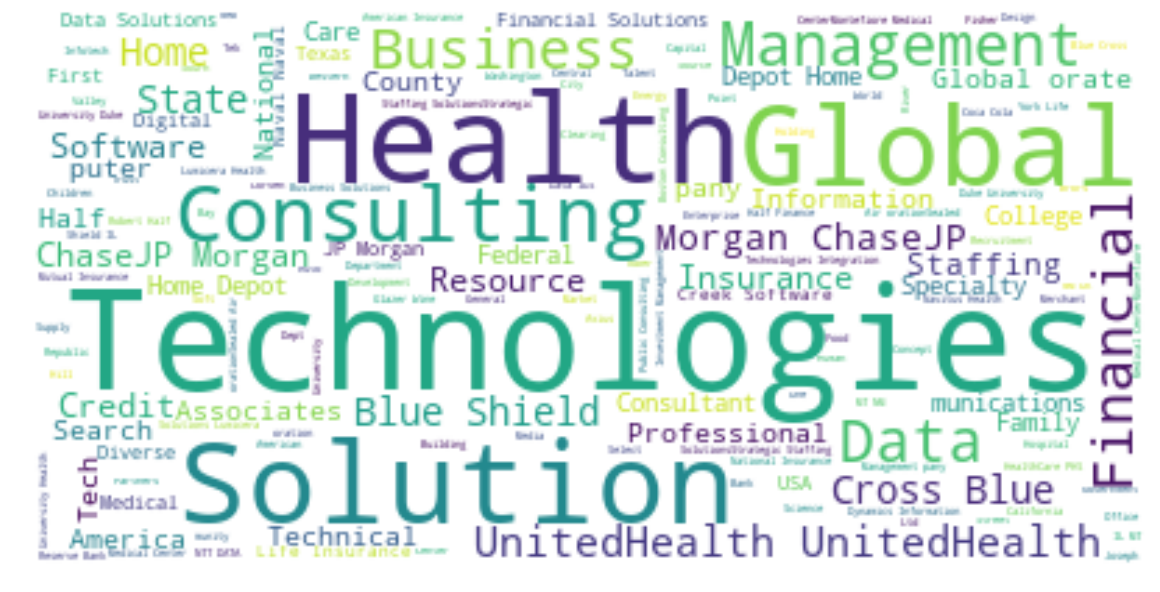

In [408]:
plt.figure(figsize=(20, 15))
plt.imshow(wcbacom, interpolation='bilinear')
plt.axis("off")
plt.axis("off")
plt.show()

In [409]:
statelist = ['AZ','CA', 'FL', 'GA', 'IL','IN', 'MA', 'MD', 'MI', 'MN', 'NC', 'NJ','NY', 'OH', 'PA', 'TX', 'VA', 'WA', 'WI']

In [410]:
df_job_plot = df_jobs.groupby(['state','job_category']).title.count().reset_index().pivot(index ='state', columns='job_category', values= 'title')
df_job_plot = df_job_plot.loc[statelist]
df_job_plot

job_category  Business Analyst  Data Analyst  Data Engineer  Data Scientist
state                                                                      
AZ                       232.0          91.0           32.0            29.0
CA                      1083.0         950.0          708.0          1010.0
FL                       670.0         220.0           52.0            85.0
GA                       533.0         167.0           77.0           110.0
IL                       650.0         253.0          126.0           202.0
IN                        99.0          46.0           10.0            24.0
MA                       569.0         278.0          144.0           262.0
MD                       324.0         177.0           54.0           118.0
MI                       288.0         133.0           35.0            68.0
MN                       350.0         113.0           40.0            59.0
NC                       428.0         177.0           80.0           101.0
NJ                       638.0         197.0           57.0           186.0
NY                       532.0         510.0          295.0           691.0
OH                       351.0         163.0           41.0            72.0
PA                       240.0         215.0           76.0           116.0
TX                      1053.0         387.0          172.0           188.0
VA                       559.0         320.0          128.0           289.0
WA                       298.0         203.0          478.0           245.0
WI                       196.0          66.0           26.0            23.0

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

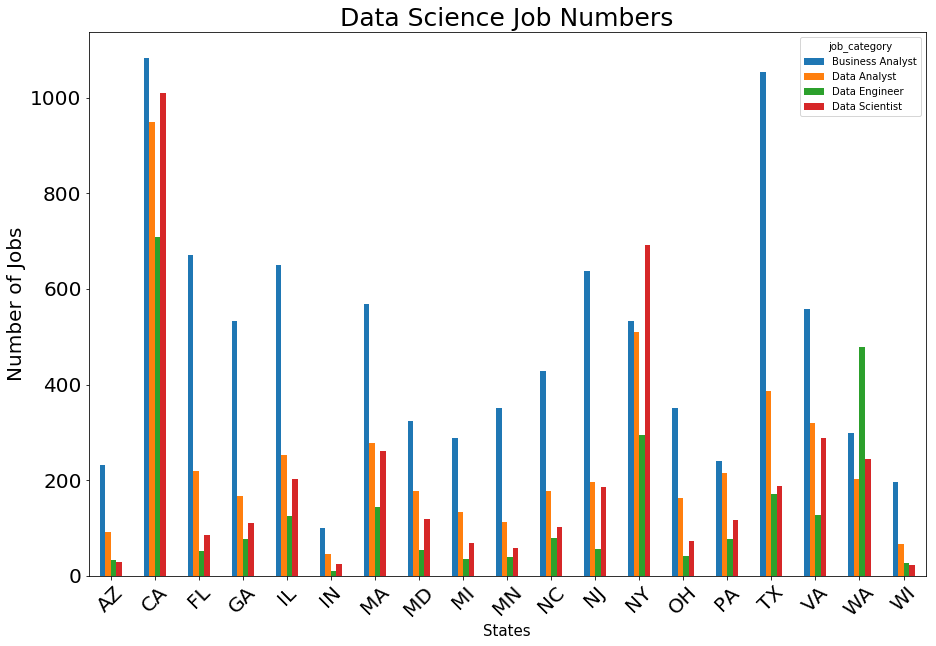

In [461]:
plt.rcParams['figure.figsize'] = (15,10)
df_job_plot.plot.bar(fontsize=20)
plt.title('Data Science Job Numbers', fontsize=25)
plt.xlabel('States',fontsize=15)
plt.ylabel('Number of Jobs',fontsize=20)
plt.savefig('#jobs statewide.png', dpi=500)
plt.xticks(rotation=45)

In [446]:
df_salary = pd.read_csv("Salary_combined_alldata.csv")

In [197]:
dd

0         1         2         3
0  0.613771  0.374934  0.516941  0.538914
1  0.615296  0.482720  1.207288  2.019694
2  1.520752  2.112860  1.260307  3.697561
3  1.826798  2.274391  2.387791  3.725370
4  1.855809  3.113274  3.385400  3.922223

In [413]:
df_salary.head(10)

list(map(lambda newstr: float(newstr.replace("$", "").replace(",","").strip()), df_salary.salary_year))

df_salary ['$_year'] = list(map(lambda newstr: float(newstr.replace("$", "").replace(",","").strip()), df_salary.salary_year))

df_salary.head(10)

title      Avg_salary State      job_category  \
0                     V Dart, Inc.   $65.00 per day    CA  Business Analyst   
1                         Etonwood     $798 per day    CA  Business Analyst   
2               Kanand Corporation     $312 per day    CA  Business Analyst   
3         Cygnus Professionals Inc   $69.73 per day    CA  Business Analyst   
4  Greenlight Technical Consulting   $72.46 per day    CA  Business Analyst   
5              Xoriant Corporation     $501 per day    FL  Business Analyst   
6                     V Dart, Inc.     $130 per day    MA  Business Analyst   
7                     V Dart, Inc.     $120 per day    MD  Business Analyst   
8                        Tekwissen   $69.88 per day    MI  Business Analyst   
9                     V Dart, Inc.   $90.00 per day    MI  Business Analyst   

    salary_year     $_year  
0   $16,965.00    16965.00  
1  $208,278.00   208278.00  
2   $81,432.00    81432.00  
3   $18,199.53    18199.53  
4   $18,912.06    18912.06  
5  $130,761.00   130761.00  
6   $33,930.00    33930.00  
7   $31,320.00    31320.00  
8   $18,238.68    18238.68  
9   $23,490.00    23490.00

In [414]:
df_salary_plot = df_salary.groupby('job_category')

df_salary_plot1 = df_salary_plot['$_year'].agg([np.mean,np.std])
df_salary_plot1

mean           std
job_category                                 
Business Analyst   83184.566761  24498.900903
Data Analyst       71321.593180  25989.293729
Data Engineer     124197.259869  30036.734595
Data Scientist    126476.147233  35293.012500

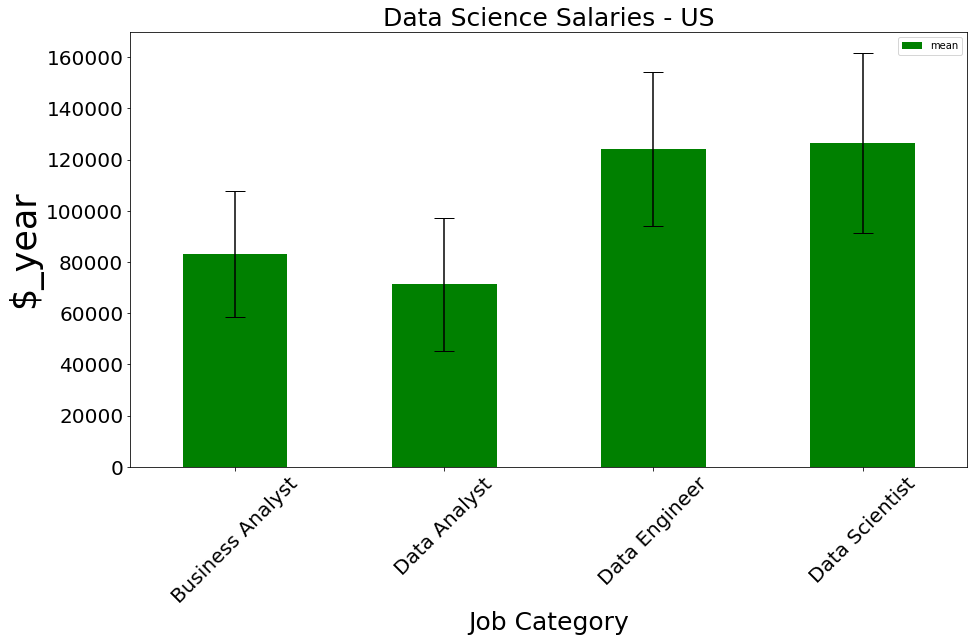

In [444]:
#ind = np.arange(4)
#width = 0.4
#Salary_plot = plt.bar (job_category, df_salary_plot1.mean, width, yerr= df_salary_plot1.std)

plt.rcParams['figure.figsize'] = (15,8)
df_salary_plot1.plot.bar(color='green', ecolor = 'black', yerr= 'std', capsize=10, fontsize=20)
plt.title('Data Science Salaries - US',fontsize=25)
plt.xlabel('Job Category',fontsize=25)
plt.ylabel('$_year', fontsize=35)
plt.xticks(rotation=45)
plt.savefig('DS Salaries_US.png', dpi=300)

In [279]:
df_salary_state = df_salary.groupby(['State','job_category'])
df_salary_state = df_salary_state['$_year'].agg([np.mean,np.std])
df_salary_state= df_salary_state.reset_index().pivot(index ='State', columns='job_category', values= ['mean','std'])

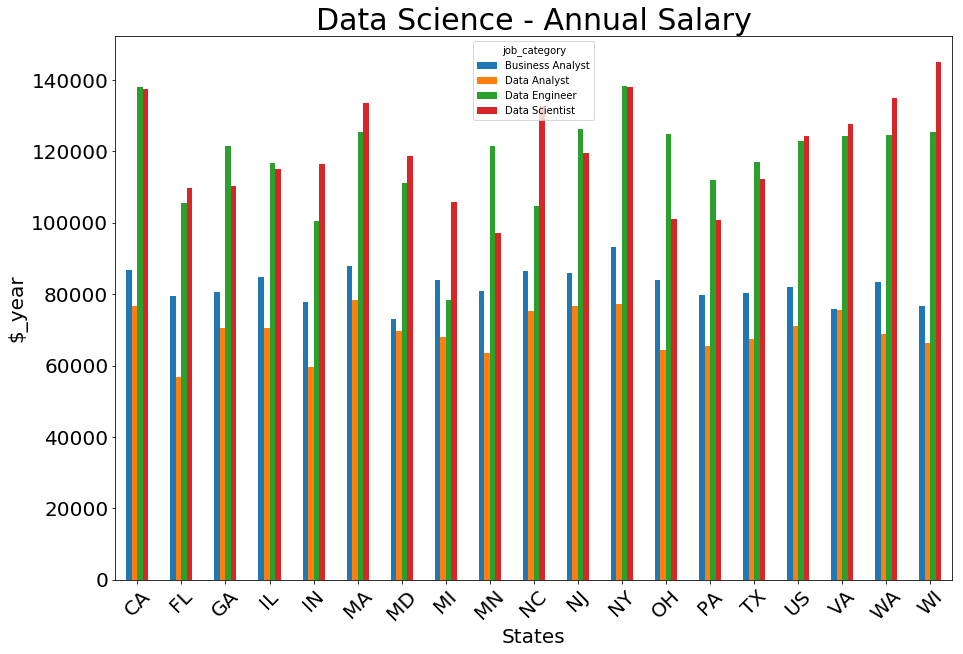

In [462]:
plt.rcParams['figure.figsize'] = (15,10)
df_salary_state['mean'].plot.bar(fontsize=20)
plt.title('Data Science - Annual Salary', fontsize=30)
plt.xlabel('States', fontsize=20)
plt.ylabel('$_year', fontsize=20)
plt.xticks(rotation=45)
plt.savefig('DS Salaries_Statewise.png', dpi=00)

NameError: name 'rcParams' is not defined